In [1]:
# import normal work libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# import StandardScaler
from sklearn.preprocessing import StandardScaler

# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# import KMeans clustering libraries
from sklearn.cluster import KMeans

# import DBScan clustering libraries
from sklearn.cluster import DBSCAN


In [2]:
# Read input file
df_airlines = pd.read_excel('EastWestAirlines.xlsx', sheet_name='data')
df_airlines.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [3]:
print('Shape: ', df_airlines.shape)

Shape:  (3999, 12)


In [4]:
df_airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [5]:
# Check unique value of columns in the given data to convert them into categorical
df_airlines_columns = df_airlines.columns


for i in df_airlines_columns:
  print('Column name Unique Values count ', i, ': ', len(df_airlines[i].unique()))

Column name Unique Values count  ID# :  3999
Column name Unique Values count  Balance :  3904
Column name Unique Values count  Qual_miles :  164
Column name Unique Values count  cc1_miles :  5
Column name Unique Values count  cc2_miles :  3
Column name Unique Values count  cc3_miles :  5
Column name Unique Values count  Bonus_miles :  2734
Column name Unique Values count  Bonus_trans :  57
Column name Unique Values count  Flight_miles_12mo :  343
Column name Unique Values count  Flight_trans_12 :  35
Column name Unique Values count  Days_since_enroll :  2820
Column name Unique Values count  Award? :  2


In [6]:
df_airlines[df_airlines.isnull()].count()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [7]:
df_airlines[df_airlines.duplicated()].count()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

Observation: All fields are numeric. cc1_miles, cc2_miles, cc3_miles and Award? columns need to be changed to categorical.

No null values exist.

No duplicates exist.

In [8]:
cat_columns = ['cc1_miles', 'cc2_miles', 'cc3_miles', 'Award?']
for i in cat_columns:
  df_airlines[i] = df_airlines[i].astype('category')

df_airlines.dtypes

ID#                     int64
Balance                 int64
Qual_miles              int64
cc1_miles            category
cc2_miles            category
cc3_miles            category
Bonus_miles             int64
Bonus_trans             int64
Flight_miles_12mo       int64
Flight_trans_12         int64
Days_since_enroll       int64
Award?               category
dtype: object

In [9]:
df_airlines_backup = df_airlines

**Standardization**

In [10]:
# Normalization function
stdscaler = StandardScaler()
df_airlines_std = stdscaler.fit_transform(df_airlines.iloc[:,1:])
print('Shape after Standardization: ', df_airlines_std.shape)
print(df_airlines_std)

Shape after Standardization:  (3999, 11)
[[-4.51140783e-01 -1.86298687e-01 -7.69578406e-01 ... -3.62167870e-01
   1.39545434e+00 -7.66919299e-01]
 [-5.39456874e-01 -1.86298687e-01 -7.69578406e-01 ... -3.62167870e-01
   1.37995704e+00 -7.66919299e-01]
 [-3.20031232e-01 -1.86298687e-01 -7.69578406e-01 ... -3.62167870e-01
   1.41192021e+00 -7.66919299e-01]
 ...
 [-4.29480975e-05 -1.86298687e-01  6.83121167e-01 ... -3.62167870e-01
  -1.31560393e+00  1.30391816e+00]
 [-1.85606976e-01 -1.86298687e-01 -7.69578406e-01 ... -9.85033311e-02
  -1.31608822e+00 -7.66919299e-01]
 [-7.00507951e-01 -1.86298687e-01 -7.69578406e-01 ... -3.62167870e-01
  -1.31754109e+00 -7.66919299e-01]]


##**Hierarchical Clustering**

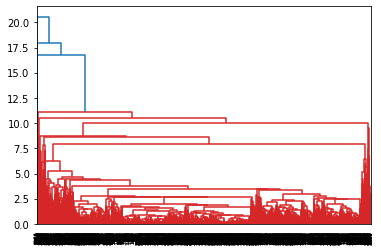

In [11]:
# Create a dendogram
#dendogram = sch.dendrogram(sch.linkage(df_airlines_std, method='average'))

Observation: When data is small, Dendogram gives good analysis to choose number of clusters. Also, Hierarchical clustering works best with small data. Since this Airlines data is huge, dendogram is not understandable at all. 

For Hierarchical clustering also, we can choose number of clusters as per KMeans clustering. 

KMeans and DBScan clusterings works best for large data.

In [21]:
# Create clusters
hc = AgglomerativeClustering(n_clusters=8, affinity="euclidean", linkage="average").fit(df_airlines_std)
hc

AgglomerativeClustering(linkage='average', n_clusters=8)

In [22]:
hc.labels_

array([1, 1, 1, ..., 1, 1, 1])

In [23]:
df_airlines['HC_Cluster'] = hc.labels_
df_airlines.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,HC_Cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1


In [24]:
df_airlines['HC_Cluster'].value_counts()

1    3924
0      43
3      15
6       7
2       5
7       3
5       1
4       1
Name: HC_Cluster, dtype: int64

In [25]:
df_airlines['HC_Cluster'].unique()

array([1, 0, 3, 6, 5, 2, 7, 4])

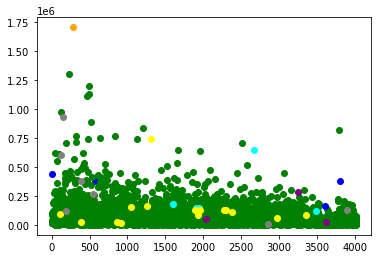

In [26]:
color = ['blue', 'green', 'cyan', 'yellow', 'blue', 'orange', 'grey', 'purple']
for i in range(0,8):
  data=df_airlines[df_airlines['HC_Cluster']==i]
  plt.scatter(data['ID#'], data['Balance'], c=color[i])
plt.show()

##  **KMeans Clustering**

In [27]:
# Find the optimal number of K
# The KMeans algorithm aims to choose centeroids that minimize the inertia, or within cluster sum of squares criteria

In [28]:
wcss= []
for i in range(1,20):
  kmeans = KMeans(n_clusters=i, random_state=123)
  kmeans.fit(df_airlines_std)
  wcss.append(kmeans.inertia_) # This is nothing but wss

In [29]:
wcss

[43989.000000000015,
 35409.51662986132,
 30899.24682465222,
 27162.193190220714,
 23707.021227572175,
 21470.502971751066,
 18893.59434829802,
 17316.756184700596,
 15960.424188770638,
 14730.610521329676,
 13705.524765615988,
 12947.800894638407,
 12424.564356626364,
 12026.62621759449,
 11603.894293113513,
 11090.851157325269,
 10786.43161273481,
 10459.455779871507,
 10045.394142789752]

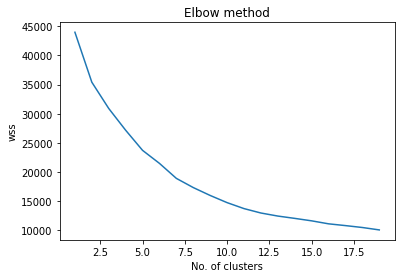

In [30]:
plt.plot(range(1,20), wcss)
plt.title('Elbow method')
plt.xlabel('No. of clusters')
plt.ylabel('wss')
plt.show()

Observation: Dividing data into ten clusters gives best results.

In [31]:
kmeans_final = KMeans(n_clusters=10, random_state=442)
kmeans_final.fit(df_airlines_std)

KMeans(n_clusters=10, random_state=442)

In [32]:
kmeans_final.labels_

array([2, 2, 2, ..., 1, 4, 4], dtype=int32)

In [33]:
df_airlines['KMeans_Cluster'] = kmeans_final.labels_

In [34]:
df_airlines.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,HC_Cluster,KMeans_Cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1,2
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1,2
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1,2
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1,2
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1,9


In [35]:
df_airlines['KMeans_Cluster'].value_counts()

4    995
2    803
1    783
5    610
9    523
3     98
0     76
6     53
7     43
8     15
Name: KMeans_Cluster, dtype: int64

In [36]:
# Centroids of KMeans Clustering
Centroids = df_airlines.groupby(['KMeans_Cluster']).mean()
Centroids

,ID#,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,HC_Cluster
KMeans_Cluster,,,,,,,,,
0,940.960526,553595.618421,289.328947,64132.763158,21.131579,1501.842105,5.157895,6237.276316,1.315789
1,1955.116220,56187.160920,91.966794,10212.727969,10.264368,408.920817,1.265645,4241.973180,1.000000
2,1145.377335,47270.008717,32.362391,2993.637609,5.983811,181.307597,0.542964,5630.992528,1.000000
3,1886.938776,130419.795918,459.551020,31304.234694,29.663265,6801.346939,19.061224,4370.173469,1.265306
4,3200.605025,31387.915578,37.495477,2950.507538,5.649246,153.761809,0.455276,1983.563819,1.000000
5,1867.759016,107458.181967,20.942623,28029.834426,17.350820,178.160656,0.508197,4393.050820,1.000000
6,2092.452830,118330.113208,5728.433962,18361.716981,12.433962,968.245283,2.905660,3916.000000,1.000000
7,2269.372093,68876.581395,23.255814,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.000000
8,1664.866667,138061.400000,78.800000,93927.866667,28.066667,506.666667,1.600000,4613.866667,3.000000


Observation: 
The following data needs to be verified since these given column average values are very high compared to nearby cluster averages.  

Cluster number, concerned Column name and average value are given for verification.

Cluster:0, Balance: 553595.618;

Cluster:6, Qual_miles: 5728.433;

Cluster:3, Flight_miles_12mo: 6801.346

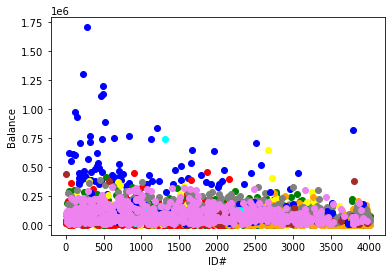

In [37]:
color = ['blue', 'green', 'red', 'yellow', 'orange', 'grey', 'blue', 'brown', 'cyan', 'violet', 'indigo']
for i in range(0,11):
  data=df_airlines[df_airlines['KMeans_Cluster']==i]
  plt.scatter(data['ID#'], data['Balance'], c=color[i])
plt.xlabel('ID#')
plt.ylabel('Balance')
#plt.plot(Centroids['Rape'], c='red' )
plt.show()

## **DBScan Clustering**

In [38]:
dbscan = DBSCAN(eps=3, min_samples= 12)
dbscan.fit(df_airlines_std)
# Noisy samples are given the label -1
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [39]:
df_airlines['DB_Cluster'] = dbscan.labels_
df_airlines.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,HC_Cluster,KMeans_Cluster,DB_Cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1,2,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1,2,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1,2,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1,2,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1,9,0


In [40]:
# Noisy data or outliers
df_airlines[df_airlines['DB_Cluster'] == -1]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,HC_Cluster,KMeans_Cluster,DB_Cluster
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,0,7,-1
65,66,53914,0,3,1,1,33767,45,5550,29,6826,1,1,3,-1
106,109,96627,1182,1,1,3,49059,26,2300,9,6738,1,3,8,-1
117,120,969559,0,1,1,1,2500,3,1000,2,7718,1,1,0,-1
126,129,602064,0,5,1,1,194753,26,2250,10,7652,1,6,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3594,3617,27619,0,4,1,1,83726,68,14050,46,1325,1,7,3,-1
3772,3795,822321,0,5,1,1,138334,26,600,2,3288,1,1,0,-1
3788,3811,374613,0,1,2,1,23592,31,5000,14,3463,1,0,7,-1
3846,3869,97510,1678,5,1,1,71609,51,7650,26,1665,1,1,3,-1


Final Conclusion: 

This airlines data can be best divided into ten clusters using KMeans. 
DBScan is indicating that there are some noise rows exists. However, numbers are very small compared to whole data numbers. Hence, impact of these layers on clustering is minimal.  
